In [18]:
!pip install -I git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-req-build-u81qbcw6
  Using cached qiskit-0.23.6-py3-none-any.whl
  Using cached qiskit_aer-0.7.5-cp38-cp38-manylinux2010_x86_64.whl (17.6 MB)
  Using cached qiskit_aqua-0.8.2-py3-none-any.whl (2.1 MB)
  Using cached docplex-2.15.194-py3-none-any.whl
  Using cached qiskit_ibmq_provider-0.11.1-py3-none-any.whl (195 kB)
  Using cached qiskit_ignis-0.5.2-py3-none-any.whl (203 kB)
  Using cached qiskit_terra-0.16.4-cp38-cp38-manylinux2010_x86_64.whl (8.6 MB)
  Using cached Cython-0.29.22-cp38-cp38-manylinux1_x86_64.whl (1.9 MB)
  Using cached dill-0.3.3-py2.py3-none-any.whl (81 kB)
  Using cached fastjsonschema-2.15.0-py3-none-any.whl (21 kB)
  Using cached jsonschema-3.2.0-py2.py3-none-any.whl (56 kB)
  Using cached attrs-20.3.0-py2.py3-none-any.whl (49 kB)
  Using cached nest_asyncio-1.5.1-py3-none-any.whl (5.0 kB)
  Using cached networkx-2.5-py3-none-any.whl (1.6 MB)
  Using cached decorator-4.4.2-py2.

# Problem: Reflection unitaries

In the previous two problems, the output of a classical Boolean function is computed into an additional qubit. However, quantum computers can also compute Boolean functions into the phase of a quantum state, which we explore in this problem.

Suppose $f:\{0,1\}^n\rightarrow\{0,1\}$ is a Boolean function. For $\beta \in R$, define an $\textit{n}$-qubit unitary

$$
\large
\begin{equation*}
    U_f(\beta) = \sum_{x\in\{0,1\}^n} e^{i\beta f(x)}|x\rangle \langle x|
\tag{1}
\end{equation*}
$$
When $U_f$ is applied to computational basis state $|x\rangle$ it adds a phase $e^{i\beta}$ if $f(x) = 1$ and does  nothing otherwise.<br>
Your goal in this problem is to implement $U_f$ for a variety of functions with $\textit{n}$= 3
<h3>
\begin{align}
f_0(x_1x_2x_3)&=0,\quad f_1(x_1x_2x_3)=x_1x_2x_3,\quad f_2(x_1x_2x_3)=x_1x_2x_3+(1-x_1)(1-x_2)(1-x_3),\\\nonumber
f_3(x_1x_2x_3)&=x_1+x_2+x_3+x_1x_2x_3,\quad f_4(x_1x_2x_3)=x_1+x_2+x_3.
\tag{2}
\end{align}
</h3>
Here, $f_m$ has m solutions to f(x) = 1. For instance,$f_2$ evaluates to 1 on the inputs x = 000 and x = 111.You may use $A \geq 0$ ancilla qubits in your implementation initialized in $∣0^A\rangle$ as long as they are returned to $∣0^A\rangle$ by the end of the computation. Two examples are shown in Fig.2 for n= 2 functions.

![icpc_reflections.png](icpc_reflections.png "ShowMyImage")

The "reflection unitaries" $U_f(\beta)$ are useful in some quantum algorithms. In particular, the famous Grover search algorithm uses these reflections to outperform classical search algorithms for unstructured lists.

In [117]:
from IPython.display import display

<h1>
    $f_m$ for m = 0

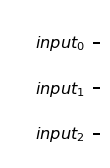

In [118]:
# Importing the qiskit module
from qiskit import *
from qiskit.circuit import Parameter

q0 =   3 # number of required qubits
a0 =   0 # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_0(q,a):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_0 = Circuit_0(q0,a0)

<h1>
    $f_m$ for m = 1

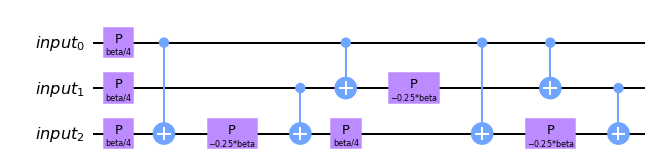

8

In [119]:
# Importing the qiskit module
from qiskit import *


q1 =   3  # number of required qubits
a1 =   0  # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_1(q,a):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    
    qc = Circ
    beta = Parameter('beta')
    """
    #qc.mct(Q, A[0])
    qc.rccx(Q[0], Q[1], A[1])
    qc.rccx(Q[2], A[1], A[0])
    qc.p(beta, A[0])
    #qc.mct(Q, A[0])
    qc.rccx(Q[2], A[1], A[0])
    qc.rccx(Q[0], Q[1], A[1])
    """
    """
    qc.p(beta/4, Q)
    qc.cx(Q[0], Q[1])
    qc.p(-beta/4, Q[1])
    qc.cx(Q[0], Q[1])
    qc.cx(Q[0], Q[2])
    qc.p(-beta/4, Q[2])
    qc.cx(Q[1], Q[2])
    qc.p(beta/4, Q[2])
    qc.cx(Q[0], Q[2])
    qc.p(-beta/4, Q[2])
    qc.cx(Q[1], Q[2])
    """
    
    qc.p(beta/4, Q)
    qc.cx(Q[0], Q[2])
    qc.p(-beta/4, Q[2])
    qc.cx(Q[1], Q[2])
    qc.p(beta/4, Q[2])
    qc.cx(Q[0], Q[1]) #
    qc.p(-beta/4, Q[1]) #
    qc.cx(Q[0], Q[2])
    qc.cx(Q[0], Q[1]) #
    qc.p(-beta/4, Q[2])
    qc.cx(Q[1], Q[2])
    
    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_1 = Circuit_1(q1,a1)
qc_1.depth()

<h1>
    $f_m$ for m = 2

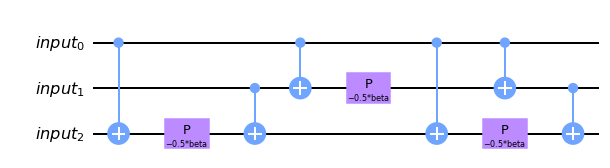

In [120]:
# Importing the qiskit module
from qiskit import *


q2 =   3  # number of required qubits
a2 =   0 # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_2(q,a):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    
    qc = Circ
    beta = Parameter('beta')
    
    """
    #qc.mct(Q, A[0])
    qc.rccx(Q[0], Q[1], A[2])
    qc.rccx(Q[2], A[2], A[0])
    #qc.rccx(Q[0], Q[1], A[2])
    qc.x(Q)
    
    #qc.mct(Q, A[0])
    qc.rccx(Q[0], Q[1], A[1])
    qc.rccx(Q[2], A[1], A[0])
    
    #qc.x(Q)
    
    qc.p(beta, A[0])
    
    #qc.x(Q)
    
    #qc.mct(Q, A[0])
    qc.rccx(Q[2], A[1], A[0])
    qc.rccx(Q[0], Q[1], A[1])
    qc.x(Q)
    
    #qc.mct(Q, A[0])
    #qc.rccx(Q[0], Q[1], A[2])
    qc.rccx(Q[2], A[2], A[0])
    qc.rccx(Q[0], Q[1], A[2])
    """
    """
    qc.p(beta/4, Q)
    qc.cx(Q[0], Q[2])
    qc.p(-beta/4, Q[2])
    qc.cx(Q[1], Q[2])
    qc.p(beta/4, Q[2])
    qc.cx(Q[0], Q[1])
    qc.p(-beta/4, Q[1])
    qc.cx(Q[0], Q[2])
    qc.cx(Q[0], Q[1])
    qc.p(-beta/4, Q[2])
    qc.cx(Q[1], Q[2])
    
    qc.x(Q)
    
    qc.p(beta/4, Q)
    qc.cx(Q[0], Q[2])
    qc.p(-beta/4, Q[2])
    qc.cx(Q[1], Q[2])
    qc.p(beta/4, Q[2])
    qc.cx(Q[0], Q[1])
    qc.p(-beta/4, Q[1])
    qc.cx(Q[0], Q[2])
    qc.cx(Q[0], Q[1])
    qc.p(-beta/4, Q[2])
    qc.cx(Q[1], Q[2])
    
    qc.x(Q)
    """
    
    # This would fix the overall global phase of the circuit, but global phase is meaningless anyways
    #qc.p(beta, Q[0])
    #qc.x(Q[0])
    #qc.p(beta, Q[0])
    #qc.x(Q[0])
    
    qc.cx(Q[0], Q[2])
    qc.p(-beta/2, Q[2])
    qc.cx(Q[1], Q[2])
    qc.cx(Q[0], Q[1])
    qc.p(-beta/2, Q[1])
    qc.cx(Q[0], Q[2])
    qc.cx(Q[0], Q[1])
    qc.p(-beta/2, Q[2])
    qc.cx(Q[1], Q[2])
    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_2 = Circuit_2(q2,a2)

<h1>
    $f_m$ for m = 3

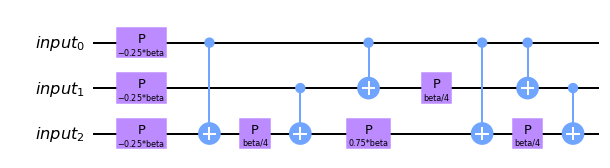

In [121]:
# Importing the qiskit module
from qiskit import *


q3 =   3  # number of required qubits
a3 =   0 # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_3(q,a):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    """
    qc = Circ
    beta = Parameter('beta')
    qc.cx(Q[0], A[0])
    qc.cx(Q[1], A[0])
    qc.cx(Q[2], A[0])
    #qc.mct(Q, A[0])
    qc.rccx(Q[0], Q[1], A[1])
    qc.rccx(Q[2], A[1], A[0])
    qc.p(beta, A[0])
    #qc.mct(Q, A[0])
    qc.rccx(Q[2], A[1], A[0])
    qc.rccx(Q[0], Q[1], A[1])
    qc.cx(Q[0], A[0])
    qc.cx(Q[1], A[0])
    qc.cx(Q[2], A[0])
    """
    
    qc = Circ
    beta = Parameter('beta')
    
    qc.p(-beta/4, Q)
    qc.cx(Q[0], Q[2])
    qc.p(beta/4, Q[2])
    qc.cx(Q[1], Q[2])
    qc.p(-beta/4+beta, Q[2])
    qc.cx(Q[0], Q[1])
    qc.p(beta/4, Q[1])
    qc.cx(Q[0], Q[2])
    qc.cx(Q[0], Q[1])
    qc.p(beta/4, Q[2])
    qc.cx(Q[1], Q[2])
    
    
    #qc.cx(Q[0], Q[2])
    #qc.cx(Q[1], Q[2])
    #qc.p(beta, Q[2])
    #qc.cx(Q[1], Q[2])
    #qc.cx(Q[0], Q[2])
    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_3 = Circuit_3(q3,a3)

<h1>
    $f_m$ for m = 4

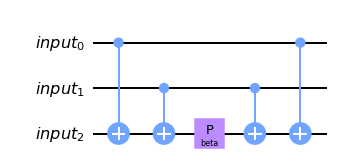

In [122]:
# Importing the qiskit module
from qiskit import *


q4 =   3  # number of required qubits
a4 =   0 # number of ancilla qubit

# Defining Quantum Circuit with the given circuits
def Circuit_4(q,a):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    

    qc = Circ
    beta = Parameter('beta')
    
    qc.cx(Q[0], Q[2])
    qc.cx(Q[1], Q[2])
    #qc.cx(Q[2], A[0])
    qc.p(beta, Q[2])
    #qc.cx(Q[2], A[0])
    qc.cx(Q[1], Q[2])
    qc.cx(Q[0], Q[2])
    
    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
#     display(Circ.draw('mpl'))
    
    return Circ

qc_4 = Circuit_4(q4,a4)

### Grader

In [123]:
all_circuits = [qc_0, qc_1, qc_2, qc_3, qc_4]
#all_circuits = [qc_0]
from qc_grader import grade_ex3

grade_ex3(all_circuits)

Checking for circuit 0 ...
Checking for circuit 1 ...
Checking for circuit 2 ...
Checking for circuit 3 ...
Checking for circuit 4 ...
Grading your answer for ex3. Please wait...

Congratulations 🎉! Your answer is correct.
Your cost is 307.
Feel free to submit your answer.



# Circuit verification and Cost Metric

$\textbf{Costing metric:}$ For the $m^{th}$ circuit, let $G_m$ be the number of 2-qubit gates, $D_m$ the depth,  and $A_m$ the number of ancillas. Your solution quality will be judged on the following cost metric: 
$$\text{Cost} = \sum_{m=0}^4 10G_m + D_m(n+A_m)$$ .
The reasoning behind this metric relates to the error rates in quantum circuits. Notice that $D_m(n+A_m)$ is roughly the spacetime volume of the circuit (the collective number of timesteps qubits participating in thecircuit must be kept alive). Also, two-qubit gates are roughly (optimistically) 10 times as likely to fail as idling qubits. Thus, $Cost_n$ is roughly proportional to error rate of all of your circuits combined.

### Submission for evaluation 

In [112]:
## Uncomment and run the following code to submit
from qc_grader import submit_ex3

submit_ex3(all_circuits)

Checking for circuit 0 ...
Checking for circuit 1 ...
Checking for circuit 2 ...
Checking for circuit 3 ...
Checking for circuit 4 ...
Submitting your answer for ex3. Please wait...
Success 🎉! Your answer has been submitted.
